<a href="https://colab.research.google.com/github/Madhumita1110/PySpark_ELT_pipeline/blob/main/A2_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis (PCA)**

**What is PCA?**

Principal component analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information of the large set. 

Smaller data sets are easy to explore and visualise but for the bigger datasets, we need some kind of technique which can reduce our dimension sensibly without losing important information from the data set.

Reduction in number of variables of a data set may also reduce our accuracy but PCA do this for us at a little cost of accuracy. 

So, to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible. It does so by creating new uncorrelated variables that successively maximize variance.

**Dataset Description**

The Steel Plates Faults Dataset has been taken from UCI ML repository. It contains 27 input attributes and 7 output variables defining each class- 
1.Pastry
2.Z_Scratch
3.K_Scatch
4.Stains
5.Dirtiness
6.Bumps
7.Other_Faults

 There are total 1941 instances. The attributes are numerical in nature. The column names and data information was stored in two separate files which we have merged.

**Hypothesis?**

We will predict the class - 'Pastry' through our model using PCA. Class 'Pastry' has been labelled 0 or 1, which means whether there is a presence of fault type Pastry or not in each plate.

In [ ]:
import requests
import  pandas as pd

response = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults27x7_var') #column names
data = response.text
data = data.split("\r\n")
data
str_list = list(filter(None, data))
str_list
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults.NNA", header=None, sep="\t", names=str_list) #dataset
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [ ]:
df.isnull().sum() #check for null values

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

Let us check correlation among each variable to have an insight of the variance explained in our data. Our goal is to minimize correlation among features and maximize correlation of features with the target.

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

#there is high correlation between features. We need to minimize this correlation. 
#We are only interested in those features which have high correlation with target and not among themselves.

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,0.316662,0.144319,-0.144319,0.136625,0.278075,-0.198461,0.063658,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251,0.134956,-0.228960,-0.419264,0.073740,0.103924,0.221296,0.164804
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,0.299390,0.112009,-0.112009,0.106119,0.242846,-0.152680,0.048575,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736,0.119814,-0.258178,-0.336084,0.061471,0.096523,0.201704,0.145783
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,-0.049211,0.075164,-0.075164,-0.207640,0.021314,-0.043117,-0.006135,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257,0.036488,-0.063327,-0.000420,-0.066601,0.064262,0.126121,-0.084415
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,-0.049219,0.075151,-0.075151,-0.207644,0.021300,-0.043085,-0.006152,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284,0.036488,-0.063329,-0.000397,-0.066606,0.064262,0.126110,-0.084422
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,-0.155853,-0.235591,0.235591,-0.183735,-0.275289,0.272808,0.017865,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947,-0.076752,-0.088440,0.556846,-0.071182,-0.050578,-0.163739,-0.184632
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,-0.134240,-0.189250,0.189250,-0.147712,-0.227590,0.306348,0.004507,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605,-0.075418,-0.060582,0.455003,-0.067547,-0.037820,-0.140197,-0.142903
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,-0.063825,-0.095154,0.095154,-0.058889,-0.111240,0.188825,-0.047511,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772,-0.017616,-0.025721,0.203063,-0.035743,-0.010058,-0.070989,-0.066801
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,-0.169331,-0.263632,0.263632,-0.204812,-0.301452,0.293691,0.049607,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248,-0.084307,-0.099592,0.616950,-0.078111,-0.055272,-0.179831,-0.205890
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,-0.023579,0.042048,-0.042048,0.103393,0.358915,-0.044111,0.066748,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797,-0.074697,0.049905,-0.461000,0.183327,0.092765,0.078690,0.228112
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,-0.098009,-0.216339,0.216339,-0.128397,0.149675,0.031425,0.065517,0.099300,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651,-0.058742,-0.189441,0.185897,0.090456,0.022157,-0.047549,-0.007784


From 7 different faults of plates, let us predict the fault type - Pastry.

In [ ]:
#features
X = df.drop(['Pastry','Z_Scratch','K_Scatch', 'Stains', 'Dirtiness','Bumps','Other_Faults'], axis=1)

# Labels
y = df['Pastry']

# Let's see the data
X

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.0206,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.0228,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.0213,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.0243,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919


Before applying any model or technique let us first scale our data to a standard normal format. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features based on unit variance
X = StandardScaler().fit_transform(X)

X

array([[-1.01648138, -1.14163891, -0.77772863, ...,  1.46765551,
        -1.0757517 , -0.00948966],
       [ 0.14189427,  0.06640322,  0.50018799, ...,  1.4175296 ,
        -0.2978242 , -0.845759  ],
       [ 0.49536213,  0.43625306, -0.05454637, ...,  1.16510269,
         0.05718506, -1.09151256],
       ...,
       [-0.81861622, -0.89239228, -0.71241235, ..., -1.13050437,
         0.91781358,  0.3609087 ],
       [-0.83398438, -0.9004325 , -0.69227956, ..., -0.28735056,
         0.76787595,  1.19776737],
       [ 1.32524319,  1.3327369 , -0.88084954, ..., -0.5657391 ,
         0.11702564, -0.16448532]])

Visualize the correlation between first two attributes X_minimum and X_maximum. They have a high positive correlation as can be seen in the heatmap also. Similary, other attributes are also having a high correlation between each other. PCA essentially minimizes this by removing highly correlated features and those features having low or zero variance for samples.

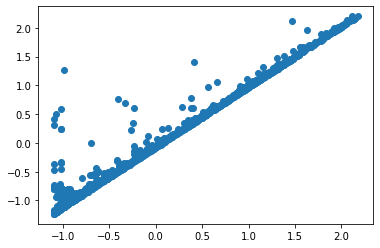

In [ ]:
# plotting X_min and X_max columns of features into scaatter plot. They have a very high positive correlation.

import matplotlib
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1])

Train a model without doing any dimension reduction at first. We have used KNN.

In [ ]:
#model without pca

from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
from sklearn.model_selection import train_test_split

#split dataset into random train and test sets.
X_train, X_test, y_train, y_test = train_test_split(\
  X, y, test_size=0.20, random_state=42)

#Train the model
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

#predict train and test data
pred_test = knn.predict(X_test)
pred_train = knn.predict(X_train)

#evaluation metrics
acc_test = sklearn.metrics.accuracy_score(pred_test,y_test)
acc_train = sklearn.metrics.accuracy_score(pred_train,y_train)

print(f'Accuracy score of train data is: {acc_train*100: .2f}%')
print(f'Accuracy score of test data is: {acc_test*100: .2f}%')

Accuracy score of train data is:  96.20%
Accuracy score of test data is:  91.77%


We got a good accuracy. But can we achieve the same or better accuracy with less features? If yes, then it would be more feasible and also convinient for us to understand our dataset in a better way. Let us look at what PCA does!

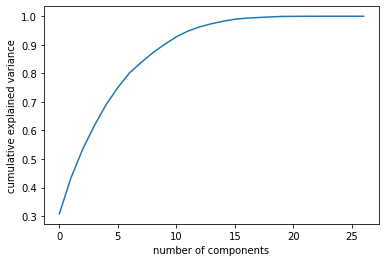

In [ ]:
from sklearn.decomposition import PCA

#fit PCA to features X
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

See that most of our information is coming from first 15 variables only. IT means that most of the variance in the dataset is lie within 15 variables. 

Suppose, we want to retain 95% variance only.

In [ ]:
pca = PCA(n_components=0.95).fit(X)      #check for 95% variance retention
X_pca = pca.transform(X)

In [ ]:
print(pca.explained_variance_ratio_)     #variance in the samples of each feature
print(sum(pca.explained_variance_ratio_))  #total variance captured

[0.30752952 0.12667002 0.10014361 0.08288579 0.07301835 0.06013609
 0.05103622 0.03702639 0.03413819 0.02892271 0.02649956 0.02026761
 0.01456109]
0.9628351537294902


Let us apply PCA to reduce dimensionality to 10 from 27, and record the accuracy. We will see how our results vary before and after the application of PCA.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(\
  X, y, test_size=0.20, random_state=42)

# Fit the PCA on the training data
pca = PCA(n_components=10)
pca.fit(X_train)

# and transform it
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Then train a simple KNN classifier
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train_pca, y_train)

#predict accuracy of train and test data
pred_test = knn.predict(X_test_pca)
pred_train = knn.predict(X_train_pca)

acc_test = sklearn.metrics.accuracy_score(pred_test,y_test)
acc_train = sklearn.metrics.accuracy_score(pred_train,y_train)

print(f'Accuracy score of train data is: {acc_train*100: .2f}%')
print(f'Accuracy score of test data is: {acc_test*100: .2f}%')

Accuracy score of train data is:  96.26%
Accuracy score of test data is:  92.54%


We got a better accuracy with PCA with reduced dimensions.

Let us try to train our model with one more algorithm- Decision Tree.

In [ ]:
#Decision Tree without PCA

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#train model
clf = tree.DecisionTreeClassifier(random_state=42, max_depth=3)
clf = clf.fit(X_train,y_train)

# Prediction step
pred_train= clf.predict(X_train)
pred_test = clf.predict(X_test)

# Train-Test accuracy
acc_train= sklearn.metrics.accuracy_score(pred_train,y_train)
acc_test = sklearn.metrics.accuracy_score(pred_test,y_test)


print(f'Accuracy score of train data is: {acc_train*100: .2f}%')
print(f'Accuracy score of test data is: {acc_test*100: .2f}%')


Accuracy score of train data is:  92.78%
Accuracy score of test data is:  91.52%


Try once again with PCA now!

In [ ]:
#Decision tree with PCA

clf = tree.DecisionTreeClassifier(random_state=42, max_depth=3)
clf = clf.fit(X_train_pca,y_train)

# Prediction step
pred_train= clf.predict(X_train_pca)
pred_test = clf.predict(X_test_pca)

# Train-Test accuracy
acc_train= sklearn.metrics.accuracy_score(pred_train,y_train)
acc_test = sklearn.metrics.accuracy_score(pred_test,y_test)


print(f'Accuracy score of train data is: {acc_train*100: .2f}%')
print(f'Accuracy score of test data is: {acc_test*100: .2f}%')

Accuracy score of train data is:  91.82%
Accuracy score of test data is:  91.77%


So, we got a good accuracy with Decision Tree also with PCA. So, PCA effectively reduced dimensions without missing much of important data.

Now, let us try to visualise target on a scatter plot after appying pca with only two features.

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [ ]:
#make a new dataframe and store features obtained from pca into it.

principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_Df

,principal component 1,principal component 2
0,-0.977232,3.020683
1,-2.256678,1.823137
2,-2.983902,1.077988
3,-1.482488,2.429416
4,1.302747,3.967834
...,...,...
1936,0.303177,-1.990798
1937,0.621537,-1.951088
1938,0.290966,-2.351728
1939,1.354815,-1.329270


In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.30752952 0.12667002]


In [ ]:
df = df.astype({"Pastry": str})

<Figure size 432x288 with 0 Axes>

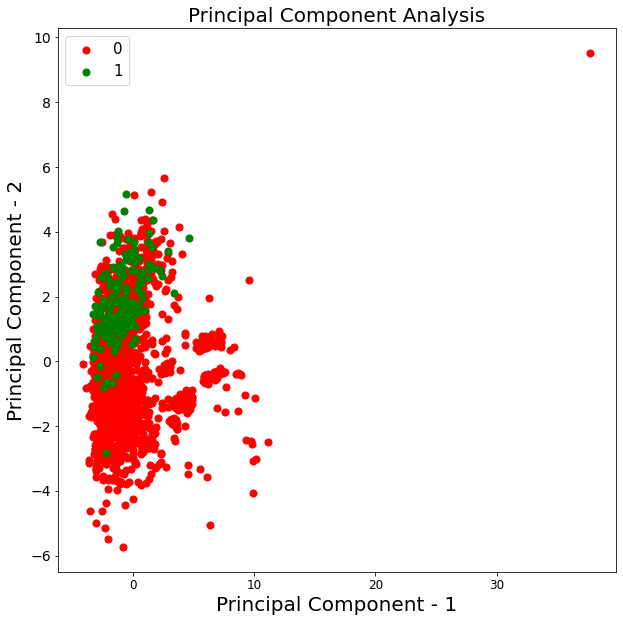

In [ ]:
#now visualise spread of target class on a scatter plot.

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = ['0', '1']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['Pastry'] == target
    plt.scatter(principal_Df.loc[indicesToKeep, 'principal component 1']
               , principal_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()